# Paris Agreement: Entry Into Force

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn
from pandas_datapackage_reader import read_datapackage

/home/robert/.virtualenvs/notebooks/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Reading in the [data package](https://github.com/openclimatedata/paris-agreement-entry-into-force) with ratification status of the Paris Agreement.

In [3]:
eif = read_datapackage("https://github.com/openclimatedata/paris-agreement-entry-into-force")

In [4]:
eif.head()

,Name,Signature,Ratification-Acceptance-Approval,Emissions,Percentage,Year
Country Code,,,,,,
AFG,Afghanistan,2016-04-22,NaT,19328.0,0.05,2005
ALB,Albania,2016-04-22,NaT,6717.0,0.02,2000
DZA,Algeria,2016-04-22,NaT,111023.0,0.30,2000
AND,Andorra,2016-04-22,NaT,522.0,0.00,2011
AGO,Angola,2016-04-22,NaT,61611.0,0.17,2005


In [5]:
eif.count()

Name                                197
Signature                           180
Ratification-Acceptance-Approval     22
Emissions                           191
Percentage                          191
Year                                191
dtype: int64

The European Union is contained as a block and as single parties so we remove the individual parties.

In [6]:
eu28 = [
  'BEL',
  'BGR',
  'DNK',
  'DEU',
  'EST',
  'FIN',
  'FRA',
  'GRC',
  'IRL',
  'ITA',
  'HRV',
  'LVA',
  'LTU',
  'LUX',
  'MLT',
  'NLD',
  'AUT',
  'POL',
  'PRT',
  'ROU',
  'SWE',
  'SVK',
  'SVN',
  'ESP',
  'CZE',
  'HUN',
  'GBR',
  'CYP'
]
assert(len(eu28) == 28)

In [7]:
parties = eif.drop(eu28)

For the emissions shares the last available data submitted to the UNFCCC was used.

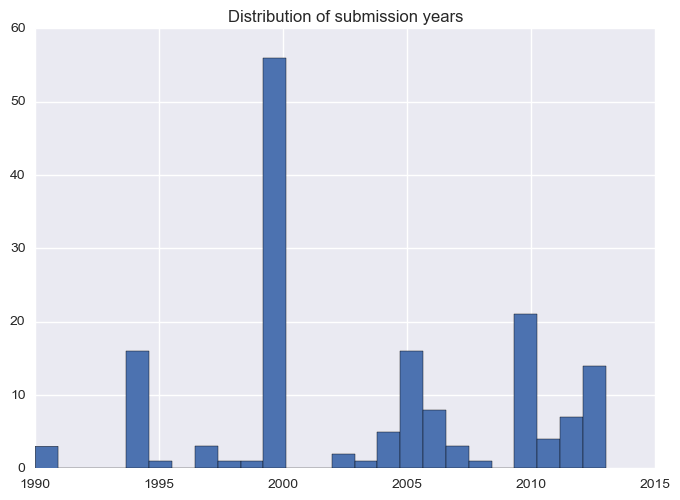

In [8]:
parties.Year.hist(bins=25 )
plt.title("Distribution of submission years")

And a look at how emissions are distributed, many countries with small shares.

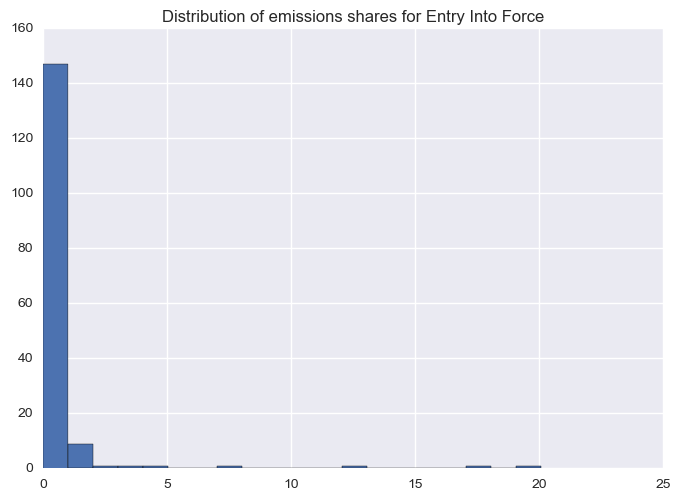

In [9]:
parties.Percentage.hist(bins=20)
plt.title("Distribution of emissions shares for Entry Into Force")

In [10]:
not_ratified = parties[parties["Ratification-Acceptance-Approval"].isnull() != False]
ratified = parties[parties["Ratification-Acceptance-Approval"].isnull() == False]

In [11]:
print(ratified.Percentage.sum())

1.08


The first four biggest emitters who have not ratified yet would be enough to meet the 55% condition.

In [12]:
print(not_ratified.sort_values("Percentage", ascending=False).head(4).Percentage.sum())

57.61
